# About Pulmonary Fibrosis:

**Pulmonary fibrosis** is a condition that causes lung scarring and stiffness. This makes it difficult to breathe. It can prevent your body from getting enough oxygen and may eventually lead to respiratory failure, heart failure, or other complications.

Researchers currently believe that a combination of exposure to lung irritants like certain chemicals, smoking, and infections, along with genetics and immune system activity, play key roles in pulmonary fibrosis.

![Pulmonary Fibrosis](https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fwww.pulmonologyadvisor.com%2Fwp-content%2Fuploads%2Fsites%2F21%2F2019%2F03%2Ffibrosis.tuberculosis_SH_414679936.jpg&f=1&nofb=1)

# Basic EDA and DICOM Visualization

I know you're excited for the new competition! Let's start with some EDA and the most important part, visualizing DICOM images!

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tqdm
import re
import cv2

In [2]:
train_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/train.csv')
test_df = pd.read_csv('../input/osic-pulmonary-fibrosis-progression/test.csv')

Here is our train.csv:

In [3]:
train_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00007637202177411956430,-4,2315,58.253649,79,Male,Ex-smoker
1,ID00007637202177411956430,5,2214,55.712129,79,Male,Ex-smoker
2,ID00007637202177411956430,7,2061,51.862104,79,Male,Ex-smoker
3,ID00007637202177411956430,9,2144,53.950679,79,Male,Ex-smoker
4,ID00007637202177411956430,11,2069,52.063412,79,Male,Ex-smoker


It seems that there isn't missing data. This is great!

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1549 entries, 0 to 1548
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        1549 non-null   object 
 1   Weeks          1549 non-null   int64  
 2   FVC            1549 non-null   int64  
 3   Percent        1549 non-null   float64
 4   Age            1549 non-null   int64  
 5   Sex            1549 non-null   object 
 6   SmokingStatus  1549 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 84.8+ KB


In [5]:
test_df.head()

,Patient,Weeks,FVC,Percent,Age,Sex,SmokingStatus
0,ID00419637202311204720264,6,3020,70.186855,73,Male,Ex-smoker
1,ID00421637202311550012437,15,2739,82.045291,68,Male,Ex-smoker
2,ID00422637202311677017371,6,1930,76.672493,73,Male,Ex-smoker
3,ID00423637202312137826377,17,3294,79.258903,72,Male,Ex-smoker
4,ID00426637202313170790466,0,2925,71.824968,73,Male,Never smoked


Only 5 rows. Ok.

In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Patient        5 non-null      object 
 1   Weeks          5 non-null      int64  
 2   FVC            5 non-null      int64  
 3   Percent        5 non-null      float64
 4   Age            5 non-null      int64  
 5   Sex            5 non-null      object 
 6   SmokingStatus  5 non-null      object 
dtypes: float64(1), int64(3), object(3)
memory usage: 408.0+ bytes


# DICOM Visualization:

Let us now visualize DICOM (`.dcm` images in the dataset.):

# What's DICOM?

**Digital Imaging and Communications in Medicine (DICOM)** is the standard for the communication and management of medical imaging information and related data. 

DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, etc.

We will be visualizing images using the `pydicom` package. 

Let's define a function to visualize DICOM images:

In [7]:
import pydicom
import glob

In [8]:
def visualize_dicom(images, limit = 16):
    images = images[:limit]
    
    fig, ax = plt.subplots(4, 4, figsize = (20, 20))
    ax = ax.flatten()
    
    for index, file in enumerate(images):
        image_data = pydicom.read_file(file).pixel_array
        ax[index].imshow(image_data, cmap = plt.cm.bone)
        
        name = '-'.join(file.split('/')[-2:])
        ax[index].set_title(name)

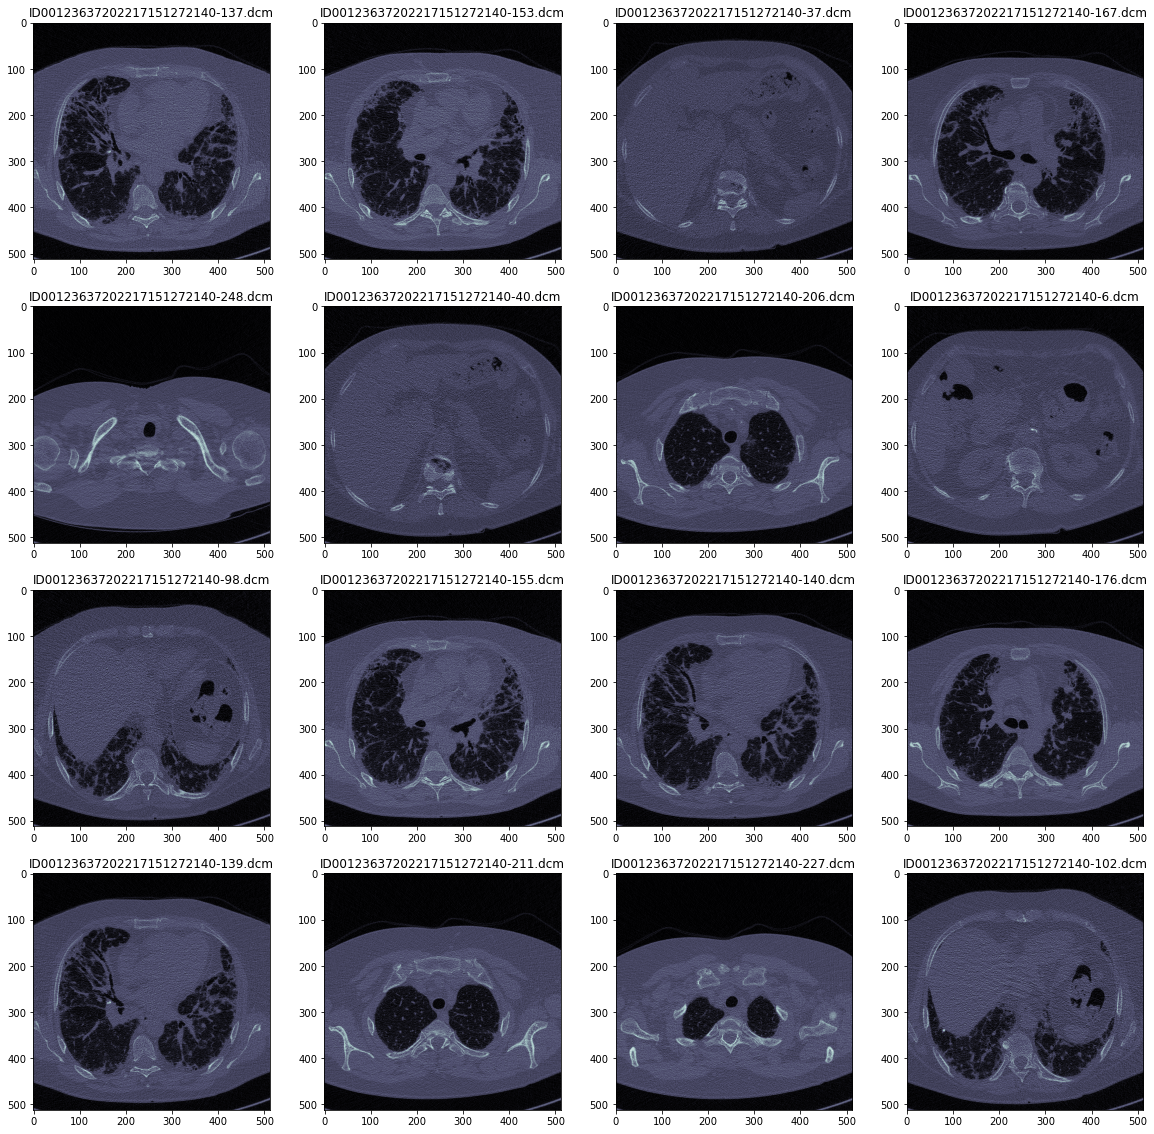

In [9]:
TRAIN_PATH = '/kaggle/input/osic-pulmonary-fibrosis-progression/train'
image_files = glob.glob(os.path.join(TRAIN_PATH, '*', '*.dcm'))

visualize_dicom(image_files)

In [10]:
# !pip3 install med2image

# Converting DICOM (.dcm) to PNG:

Let's try to convert DICOM (`.dcm`) files to PNG for future use.



In this kernel, I'll be converting sliced `.dcm` images to PNG of a particular patient with a unique ID, feel free to change the code for suitable conversion for all patients:

In [11]:
TRAIN_PATH_PATIENT = '/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140'

images_patient = glob.glob(os.path.join('/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/*.dcm'
))

images_patient.sort(key=lambda f: int(re.sub('\D', '', f)))

for index, file in enumerate(images_patient[:10]):
    print(file)

/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/1.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/2.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/3.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/4.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/5.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/6.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/7.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/8.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/9.dcm
/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/10.dcm


Let's manually make a directory for saving the converted images:

In [12]:
# ! mkdir "patient-png-1"

In [13]:
!pip3 install mritopng

     |████████████████████████████████| 649 kB 4.6 MB/s 
  Created wheel for mritopng: filename=mritopng-2.2-py3-none-any.whl size=5720 sha256=7b4184c999a0c5f1a9256198fd36613ba0f1177d754c6e3f7cf7165155bf9d86
  Stored in directory: /root/.cache/pip/wheels/db/94/d5/089d6c561c5e3c128986a694976bb2d107dc497f58e6cb4169
  Created wheel for pypng: filename=pypng-0.0.20-py3-none-any.whl size=67162 sha256=3691cf1ccc72cc27de3de4a74b8724d93a681bdf35d2319873f219f2c8003083
  Stored in directory: /root/.cache/pip/wheels/54/64/43/dfd10cf95dc1687dc5350e861321ecd9a5d76b7c3d96fa1dc6
Successfully built mritopng pypng


`mritopng` reads the folder and converts the `.dcm` files to PNG:

In [14]:
import mritopng
mritopng.convert_folder('/kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140', './patient-png-1/')

SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/137.dcm --> ./patient-png-1/./137.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/153.dcm --> ./patient-png-1/./153.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/37.dcm --> ./patient-png-1/./37.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/167.dcm --> ./patient-png-1/./167.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/248.dcm --> ./patient-png-1/./248.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/40.dcm --> ./patient-png-1/./40.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID00123637202217151272140/206.dcm --> ./patient-png-1/./206.dcm.png
SUCCESS: /kaggle/input/osic-pulmonary-fibrosis-progression/train/ID001236

Let's see the converted images:

In [15]:
images_patient_png = glob.glob(os.path.join('/kaggle/working/patient-png-1/*.png'
))
images_patient_png.sort(key=lambda f: int(re.sub('\D', '', f)))

for index, file in enumerate(images_patient_png[:10]):
    print(file)

/kaggle/working/patient-png-1/1.dcm.png
/kaggle/working/patient-png-1/2.dcm.png
/kaggle/working/patient-png-1/3.dcm.png
/kaggle/working/patient-png-1/4.dcm.png
/kaggle/working/patient-png-1/5.dcm.png
/kaggle/working/patient-png-1/6.dcm.png
/kaggle/working/patient-png-1/7.dcm.png
/kaggle/working/patient-png-1/8.dcm.png
/kaggle/working/patient-png-1/9.dcm.png
/kaggle/working/patient-png-1/10.dcm.png


Here is a small piece of code for generating a video using the converted images:

In [16]:
img_array = []
for frame in images_patient_png:
    img = cv2.imread(frame)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('project.mp4',cv2.VideoWriter_fourcc(*'mp4v'), 15, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

# Video of the Scan!

> **Update:** I uploaded the video to Imgur. The raw video must be available down in the output files section (above comments).

Here is a video of the scan, it looks really interesting:

<blockquote class="imgur-embed-pub" lang="en" data-id="a/0pCtdHN"  ><a href="//imgur.com/a/0pCtdHN">OSIC Pulmonary Fibrosis MRI Scan</a></blockquote><script async src="//s.imgur.com/min/embed.js" charset="utf-8"></script>

# Metadata in DICOM images:

DICOM images generally contain metadata like patient's name, ID, image data like photometric interpretation, transfer syntax, image width and height, etc.

More about metadata in DICOM files can be seen at: http://dicom.nema.org/dicom/2013/output/chtml/part10/chapter_7.html

Here is the metadata of the 10th image in the training set:

In [17]:
image_data = pydicom.read_file(image_files[3837])
image_data

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 206
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.0.37492.1591341959.171909
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.1
(0002, 0013) Implementation Version Name         SH: 'OSIRIX_361'
(0002, 0016) Source Application Entity Title     AE: 'ANONYMOUS'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SEQ']
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.0.37492.1591341959.171909
(0008, 0060) Modality                       

In [18]:
dir(image_data)

['BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConvolutionKernel',
 'DeidentificationMethod',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientPosition',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'RescaleIntercept',
 'RescaleSlope',
 'RescaleType',
 'RotationDirection',
 'Rows',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesInstanceUID',
 'SliceThickness',
 'SpecificCharacterSet',
 'StudyID',
 'StudyInstanceUID',
 'TableHeight',
 'WindowCenter',
 'WindowWidth',
 'XRayTubeCurrent',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem

Let's create a **utility function for extracting metadata** from DICOM images:

In [19]:
def extract_metadata(file):
    image_data = pydicom.read_file(file)
    
    record = {
        'patient_ID': image_data.PatientID,
        'patient_name': image_data.PatientName,
        'patient_sex': image_data.PatientSex,
        'modality': image_data.Modality,
        'body_part_examined': image_data.BodyPartExamined,
        'photometric_interpretation': image_data.PhotometricInterpretation,
        'rows': image_data.Rows,
        'columns': image_data.Columns,
        'pixel_spacing': image_data.PixelSpacing,
        'window_center': image_data.WindowCenter,
        'window_width': image_data.WindowWidth,
        'bits_allocated': image_data.BitsAllocated
    }
    
    return record

Let's create a empty list and append new records to the dictionary:

In [20]:
metadata_list = []

for file in tqdm.tqdm(image_files):
    metadata_list.append(extract_metadata(file))

100%|██████████| 33026/33026 [06:44<00:00, 81.65it/s]


Now we'll be converting this to a DataFrame object:

In [21]:
metadata_df = pd.DataFrame.from_dict(metadata_list)
metadata_df.head()

,patient_ID,patient_name,patient_sex,modality,body_part_examined,photometric_interpretation,rows,columns,pixel_spacing,window_center,window_width,bits_allocated
0,ID00123637202217151272140,ID00123637202217151272140,,CT,Chest,MONOCHROME2,512,512,"[0.61328125, 0.61328125]",-500,-1500,16
1,ID00123637202217151272140,ID00123637202217151272140,,CT,Chest,MONOCHROME2,512,512,"[0.61328125, 0.61328125]",-500,-1500,16
2,ID00123637202217151272140,ID00123637202217151272140,,CT,Chest,MONOCHROME2,512,512,"[0.61328125, 0.61328125]",-500,-1500,16
3,ID00123637202217151272140,ID00123637202217151272140,,CT,Chest,MONOCHROME2,512,512,"[0.61328125, 0.61328125]",-500,-1500,16
4,ID00123637202217151272140,ID00123637202217151272140,,CT,Chest,MONOCHROME2,512,512,"[0.61328125, 0.61328125]",-500,-1500,16


These were the records of the 33026 images in the training set.

In [22]:
len(metadata_df)

33026

Check more about `pydicom` here: https://pydicom.github.io/pydicom/0.9/viewing_images.html

# Basic EDA

Let us import `plotly` for making visualizations:

In [23]:
from collections import Counter
import plotly.express as px
import seaborn as sns

## Ground Truths by Researchers:

According to scientific research,

You’re more likely to be diagnosed with pulmonary fibrosis if you:

- are male
- are between the ages of 40 and 70
- have a history of smoking

Here is a distribution of the smoking status of the patients:

In [24]:
smoker_counts = dict(Counter(train_df['SmokingStatus']))
smoker_counts = {'status': list(smoker_counts.keys()), 'count': list(smoker_counts.values())}
smoker_df = pd.DataFrame(smoker_counts)

fig_smoker = px.pie(smoker_df, values = 'count', names = 'status', title = 'Smoker Status', hole = .5, color_discrete_sequence = px.colors.diverging.Portland)
fig_smoker.show()

Most patients are ex-smokers, and there are a significant amount of people who didn't smoke.

79% patients are male, 21% female:

In [25]:
sex_counts = dict(Counter(train_df['Sex']))
sex_counts = {'sex': list(sex_counts.keys()), 'count': list(sex_counts.values())}
sex_df = pd.DataFrame(sex_counts)

fig_sex = px.pie(sex_df, values = 'count', names = 'sex', title = 'Gender Distribution', hole = .5, color_discrete_sequence = px.colors.sequential.Agsunset)
fig_sex.show()

Let's see the distribution of patient's ages:

Text(0.5, 1.0, 'Histogram for Age')

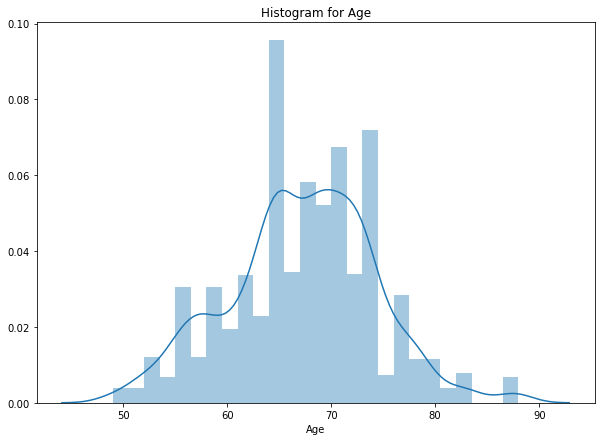

In [26]:
# Uncomment for interactive histogram
# fig_age = px.histogram(train_df, x="Age")
# fig_age.update_layout(title_text='Age Distribution')
# fig_age.show()

plt.figure(figsize = (10, 7))
ax = sns.distplot(train_df['Age'])
ax.set_title('Histogram for Age')

Let's see the FVC distribution:

**Forced vital capacity (FVC)** is the amount of air that can be forcibly exhaled from your lungs after taking the deepest breath possible, as measured by spirometry. This test may help distinguish obstructive lung diseases, such as asthma and COPD, from restrictive lung diseases, such as pulmonary fibrosis and sarcoidosis. 

Text(0.5, 1.0, 'Histogram for FVC')

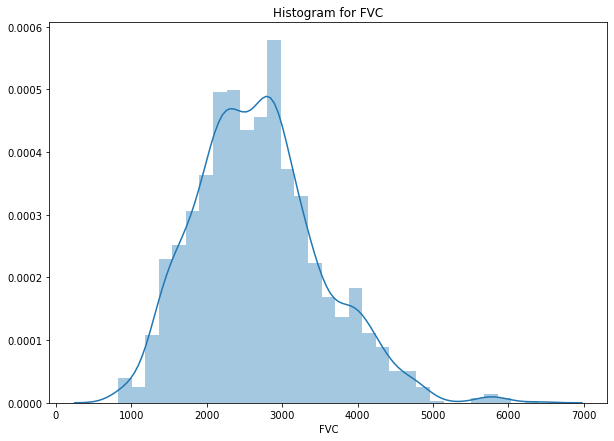

In [27]:
# Uncomment for interactive histogram
# fig_fvc = px.histogram(train_df, x="FVC")
# fig_fvc.update_layout(title_text='FVC Distribution')
# fig_fvc.show()

plt.figure(figsize = (10, 7))
ax = sns.distplot(train_df['FVC'])
ax.set_title('Histogram for FVC')

# Conclusion:

In this kernel:

- We got to know about DICOM images

- We visualized DICOM images

- Viewing sliced images as a video (Cool MRI Scan)

- We saw that with visualizations we are able to align with the study conducted by the researchers:

    - Most patients were male.
    - Most patients had a history of smoking
    - A significant portion of patients had an age between 40-70



Do upvote the kernel if you liked it!

## Give your suggestions and feel free to ask questions!

In [28]:
# Code for deleting output visualizations (reduces the chances of slow loading of the kernel)
! rm -rf './patient-png-1/'